# Proyecto 1
## Cluster
### Grupo 2

##### Sección de librerías.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

##### Importación de datos.

In [2]:
df = pd.read_csv('DATOS_PROYECTO_1/DB_LIMPIA.csv', sep = ";", index_col = 0)
df.columns

Index(['VIC_SEXO', 'VIC_EDAD', 'TOTAL_HIJOS', 'VIC_ESCOLARIDAD', 'VIC_EST_CIV',
       'VIC_GRUPET', 'VIC_TRABAJA', 'VIC_DISC', 'VIC_REL_AGR',
       'OTRAS_VICTIMAS', 'HEC_DIA', 'HEC_MES', 'HEC_ANO', 'HEC_AREA',
       'HEC_TIPAGRE', 'INST_DONDE_DENUNCIO', 'AGR_SEXO', 'AGR_EDAD',
       'AGR_ESCOLARIDAD', 'AGR_EST_CIV', 'AGR_GRUPET', 'AGR_TRABAJA',
       'INST_DENUN_HECHO', 'MEDIDAS_SEGURIDAD'],
      dtype='object')

### Situación problemática
En el conjunto tenemos información acerca del hecho, de las víctimas y agresores (según la denuncia), de denuncias de casos de violencia intrafamiliar que se han realizado entre los años 2009 a 2019. Para este conjunto de datos se buscará analizar si hay algunas características, de las personas, en las cuales podemos agrupar y diferenciar si es víctima o agresor. Este análisis no se hace con el fin de generar prejuicios, ni de perjudicar a ninguna persona cuyas características puedan ser similares a las de un grupo, solo buscamos observar si es posible realizar esta agrupación.

### Problema científico.
¿Es posible agrupar a las personas en víctimas y en agresores según las características mostradas en el conjunto de datos?

### Objetivo general.
Agrupar a individuos en la situación de víctima y agresor según las características de los individuos, mediante el uso de 2 algoritmos de agrupación, los cuales se verificarán con las etiquetas reales, con el fin de verificar si existen características compartidas entre víctimas y entre agresores.

### Objetivos específicos.
- Agrupar a individuos en la situación de víctima y agresor según las características de los individuos, haciendo uso del algoritmos de KMeans, con el fin de verificar si existen características compartidas entre víctimas y entre agresores.
- Agrupar a individuos en la situación de víctima y agresor según las características de los individuos, haciendo uso del algoritmos de AgglomerativeClustering, con el fin de verificar si existen características compartidas entre víctimas y entre agresores.


##### Se crean los DataFrame de víctimas y agresores con el fin de crear etiquetas y unificarlos.

In [3]:
# Se crea el DataFrame de víctimas.
df_victimas = df.loc[:, ['VIC_SEXO', 'VIC_EDAD', 'VIC_ESCOLARIDAD', 'VIC_EST_CIV', 'VIC_GRUPET', 'VIC_TRABAJA']]
df_victimas.columns = ['SEXO', 'EDAD', 'ESCOLARIDAD', 'ESTADO_CIVIL', 'GRUPO_ETNICO', 'TRABAJA']
df_victimas['ETIQUETA'] = 'VICTIMA'

# Se crea el DataFrame de agresores.
df_agresores = df.loc[:, ['AGR_SEXO', 'AGR_EDAD', 'AGR_ESCOLARIDAD', 'AGR_EST_CIV', 'AGR_GRUPET', 'AGR_TRABAJA']]
df_agresores.columns = ['SEXO', 'EDAD', 'ESCOLARIDAD', 'ESTADO_CIVIL', 'GRUPO_ETNICO', 'TRABAJA']
df_agresores['ETIQUETA'] = 'AGRESOR'

# Se crea el DataFrame de cluster.
df_cluster = pd.concat([df_victimas, df_agresores])
df_cluster.head(5)

,SEXO,EDAD,ESCOLARIDAD,ESTADO_CIVIL,GRUPO_ETNICO,TRABAJA,ETIQUETA
0,Mujeres,11,Primaria,Desconocido,Ladino,No,VICTIMA
1,Hombres,4,Desconocido,Desconocido,Ladino,Desconocido,VICTIMA
2,Hombres,11,Primaria,Desconocido,Ladino,No,VICTIMA
3,Mujeres,6,Desconocido,Desconocido,Ladino,Desconocido,VICTIMA
4,Hombres,11,Primaria,Desconocido,Ladino,No,VICTIMA


##### Se realiza un preprocesamiento de las variables con el fin de tener datos numéricos.

In [4]:
# Se seleccionan las columnas categóricas y numéricas.
cat_cols = ["SEXO", "ESCOLARIDAD", "ESTADO_CIVIL", "GRUPO_ETNICO", "TRABAJA"]
num_cols = ["EDAD"]

# Las columnas categóricas se transforman usando un OneHotEncoder.
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat = ohe.fit_transform(df_cluster[cat_cols])

# Se estandarizan las columnas numéricas.
scaler = StandardScaler()
X_num = scaler.fit_transform(df_cluster[num_cols])

# Se unen las variables transformadas en una matriz.
X = np.hstack([X_num, X_cat])

# Se crea el DataFrame ya con las variables transformadas.
feature_names = np.concatenate([num_cols, ohe.get_feature_names_out(cat_cols)])
X_df = pd.DataFrame(X, columns = feature_names, index = df_cluster.index)
X_df['ETIQUETA'] =  df_cluster['ETIQUETA']
X_df.head()

,EDAD,SEXO_Hombres,SEXO_Mujeres,ESCOLARIDAD_Básico,ESCOLARIDAD_Desconocido,ESCOLARIDAD_Diversificado,ESCOLARIDAD_Ninguna,ESCOLARIDAD_Primaria,ESCOLARIDAD_Universidad,ESTADO_CIVIL_Casado,...,GRUPO_ETNICO_Desconocido,GRUPO_ETNICO_Garifuna,GRUPO_ETNICO_Ladino,GRUPO_ETNICO_Maya,GRUPO_ETNICO_Otro,GRUPO_ETNICO_Xinca,TRABAJA_Desconocido,TRABAJA_No,TRABAJA_Si,ETIQUETA
0,-1.585821,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,VICTIMA
1,-2.112327,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,VICTIMA
2,-1.585821,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,VICTIMA
3,-1.961897,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,VICTIMA
4,-1.585821,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,VICTIMA


### Gráficas de Codo (Elbow Method) y de Silueta (Silhouette Score)

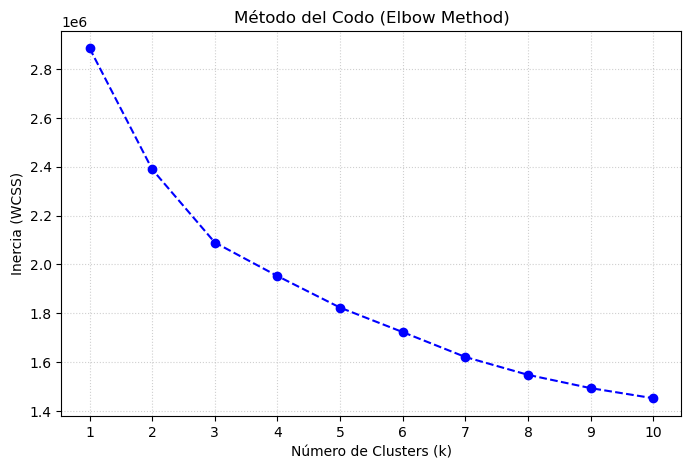

In [ ]:
# Asumimos que 'X' es tu matriz de datos o DataFrame escalado
# range_k define el intervalo de clusters que quieres probar
range_k = range(1, 11)
wcss = []

# 1. Iteración para calcular la inercia (WCSS)
for k in range_k:
    # random_state asegura que los resultados sean reproducibles
    # n_init=10 es el estándar para probar diferentes centroides iniciales
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X)
    wcss.append(model.inertia_)

# 2. Creación de la gráfica
plt.figure(figsize=(8, 5))
plt.plot(range_k, wcss, marker='o', linestyle='--', color='b')

# 3. Personalización y etiquetas
plt.title('Método del Codo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (WCSS)')
plt.xticks(range_k)  # Asegura que todos los números de k se vean en el eje X
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

Para n_clusters = 2, el score de silueta es: 0.1779
Para n_clusters = 3, el score de silueta es: 0.1677
Para n_clusters = 4, el score de silueta es: 0.1505
Para n_clusters = 5, el score de silueta es: 0.1606
Para n_clusters = 6, el score de silueta es: 0.1458
Para n_clusters = 7, el score de silueta es: 0.1602
Para n_clusters = 8, el score de silueta es: 0.1579
Para n_clusters = 9, el score de silueta es: 0.1519
Para n_clusters = 10, el score de silueta es: 0.1472


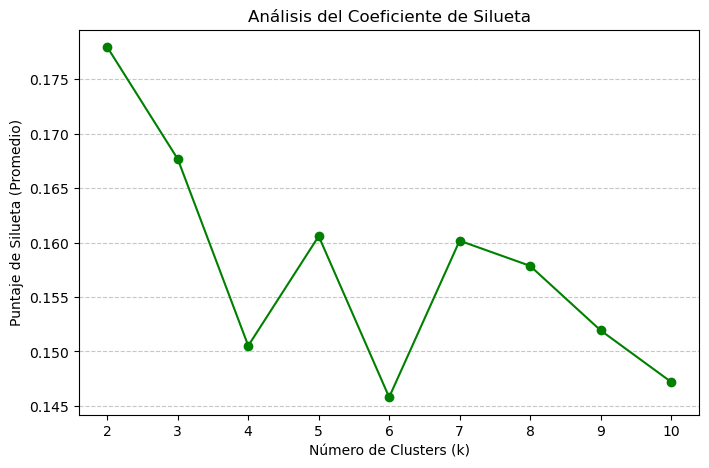

In [ ]:
# 1. Configuración del rango de clusters
# Nota: El rango debe empezar en 2, ya que no existe silueta para k=1
range_n_clusters = range(2, 11)
silhouette_scores = []

# 2. Cálculo del Silhouette Score
for n_clusters in range_n_clusters:
    # Ajustamos el modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X) # 'X' es tu matriz de datos escalada
    
    # Calculamos el promedio de silueta para este número de clusters
    silhouette_avg = silhouette_score(X, cluster_labels, sample_size=100000)
    silhouette_scores.append(silhouette_avg)
    
    # Opcional: imprimir el valor en consola para mayor precisión
    print(f"Para n_clusters = {n_clusters}, el score de silueta es: {silhouette_avg:.4f}")

# 3. Creación de la gráfica
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', color='g')

# 4. Personalización de etiquetas
plt.title('Análisis del Coeficiente de Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntaje de Silueta (Promedio)')
plt.xticks(range_n_clusters)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Según la gráfica de codo se tiene que el número óptimo de Clusters es 3, sin embargo, en el contexto del caso vale la pena considerar que deberían de existir 2 CLusters, uno para agresores y otro para víctimas. Esto se ve avalado por el gráfico de Silueta (Silhouette Score) en donde el mayor puntaje promedio de silueta es 0.1779 para 2 Clusters.

### Algoritmo KMean.

##### Entrenamiento del modelo.

In [5]:
# Se instancia el objeto.
kmeans = KMeans(
    n_clusters = 2,
    init = "k-means++",
    n_init = 20,
    max_iter = 300,
    tol = 1e-4,
    random_state = 0
)

# Se entrena el objeto y se crean las etiquetas.
labels_kmeans = kmeans.fit_predict(X)
centroids_kmeans = kmeans.cluster_centers_
labels_kmeans = kmeans.fit_predict(X)

# Se agregan las etiquetas al DataFrame
X_df['cluster_kmeans'] = labels_kmeans

##### Importancia de las variables.

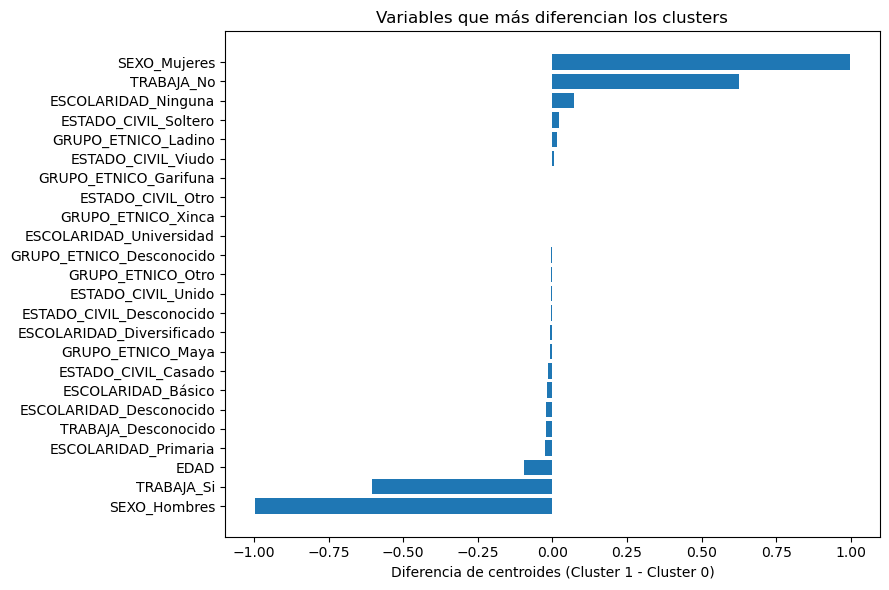

In [6]:
# Se crea un DataFrame que indica la importancia de cada variable al agrupar.
delta = centroids_kmeans[1] - centroids_kmeans[0]
df_delta = pd.DataFrame({
    'variable': feature_names,
    'centroide_c0': centroids_kmeans[0],
    'centroide_c1': centroids_kmeans[1],
    'delta_c1_minus_c0': delta,
    'abs_delta': np.abs(delta)
}).sort_values('abs_delta', ascending=False)


# Se ordenan las variables y se grafican.
ordenados_kmeans = df_delta.sort_values('delta_c1_minus_c0')
plt.figure(figsize=(9, 6))
plt.barh(ordenados_kmeans['variable'], ordenados_kmeans['delta_c1_minus_c0'])
plt.xlabel('Diferencia de centroides (Cluster 1 - Cluster 0)')
plt.title('Variables que más diferencian los clusters')
plt.tight_layout()
plt.show()


##### Tabla de conteo.

In [7]:
conteo_kmeans = pd.crosstab(X_df['ETIQUETA'], X_df['cluster_kmeans'])
conteo_kmeans

cluster_kmeans,0,1
ETIQUETA,,
AGRESOR,313910,45088
VICTIMA,36404,322594


##### Tabla de frecuencia.

In [8]:
freq_rel_kmeans =  pd.crosstab(X_df['ETIQUETA'], X_df['cluster_kmeans'], normalize = 'index')
freq_rel_kmeans

cluster_kmeans,0,1
ETIQUETA,,
AGRESOR,0.874406,0.125594
VICTIMA,0.101404,0.898596


##### Accuracy

In [9]:
print('Accurarcy:', (conteo_kmeans.iloc[0, 0] + conteo_kmeans.iloc[1, 1])/(conteo_kmeans.sum().sum()))

Accurarcy: 0.886500760449919


Podemos observar que el algoritmo de KMeans, ha generado un buen agrupamiento entre agresores y víctimas. Identificando el sexo y la condición laboral como las principales características.
En este caso podemos decir que el clúster 0 es el que representa a los agresores y el clúster 1 a las víctimas.

### Algoritmo AgglomerativeClustering.

##### Entrenamiento del modelo.

In [ ]:
# Se eligen índices aleatoriamente.
n_sample = 30000
rng = np.random.default_rng(0)
idx = rng.choice(len(X_df), size=min(n_sample, len(X_df)), replace=False)

# Se instancia el algoritmo aglomerativo.
agg = AgglomerativeClustering(n_clusters=2, linkage = 'ward', metric = 'euclidean')
labels_agg = agg.fit_predict(X[idx])

# Se crea el DataFrame para algoritmos aglomerativos.
X_df_agg = X_df.iloc[idx]
X_df_agg = X_df_agg.drop(columns = 'cluster_kmeans')

# Guardar en el DataFrame
X_df_agg['cluster_agg'] = labels_agg

##### Importancia de las variables.

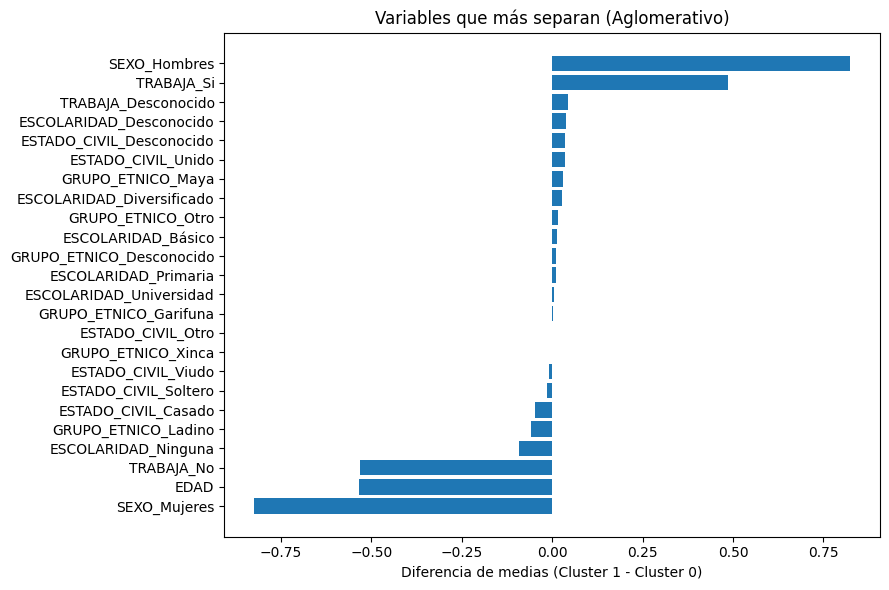

In [ ]:
mean0 = X[idx][labels_agg == 0].mean(axis=0)
mean1 = X[idx][labels_agg == 1].mean(axis=0)
delta = mean1 - mean0

sep_df = (pd.DataFrame({
    'variable': feature_names,
    'delta': delta,
    'abs_delta': np.abs(delta)
}).sort_values('abs_delta', ascending=False))

ordenados_agg = sep_df.sort_values('delta')

plt.figure(figsize=(9, 6))
plt.barh(ordenados_agg['variable'], ordenados_agg['delta'])
plt.xlabel("Diferencia de medias (Cluster 1 - Cluster 0)")
plt.title('Variables que más separan (Aglomerativo)')
plt.tight_layout()
plt.show()

##### Tabla de conteo.

In [ ]:
conteo_agg = pd.crosstab(X_df_agg['ETIQUETA'], X_df_agg['cluster_agg'])
conteo_agg

cluster_agg,0,1
ETIQUETA,,
AGRESOR,3687,11284
VICTIMA,13666,1363


##### Tabla de frecuencia.

In [ ]:
freq_rel_agg = pd.crosstab(X_df_agg['ETIQUETA'], X_df_agg['cluster_agg'], normalize = 'index')
freq_rel_agg

cluster_agg,0,1
ETIQUETA,,
AGRESOR,0.246276,0.753724
VICTIMA,0.909309,0.090691


##### Accuracy

In [ ]:
print('Accurarcy:', (conteo_agg.iloc[0, 1] + conteo_agg.iloc[1, 0])/(conteo_agg.sum().sum()))

Accurarcy: 0.8316666666666667


Podemos observar que el algoritmo Aglomerativo, ha logrado agrupar a las víctimas, pero lo ha hecho peor con los agresores, aún así un cluster logra separar bastante bien a los agresores de las víctimas. Este algoritmo a pesar de funcionar bien lo hizo un poco peor que el de KMeans, esto se puede deber a la muestra utilizada. Identificando el sexo, la condición laboral y la edad como las principales características.
En este caso podemos decir que el clúster 1 es el que representa a los agresores y el clúster 0 a las víctimas.

### Conclusiones